In [1]:
library(tidyverse)
library(glue)
library(here)
suppressPackageStartupMessages({library(rtracklayer); library(GenomicRanges)})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse


here() starts at /mnt/expressions/mp/archaic-ychr

Loading ychr



## Characteristics of three different capture sets after 50% mappability filtering

### Exome capture set - not filtered

In [2]:
exome50 <- import.bed(here("data/coord/capture_exome.bed"))

In [3]:
length(exome50)

[1] 2519

In [4]:
width(exome50) %>% sum

[1] 118643

In [5]:
import.bed("../tmp/ajhg2064mmc2_V1.txt") %>% width %>% sum

[1] 118643

In [6]:
width(exome50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     3.0    47.1    67.5  1257.0 

### Lippold capture set

In [7]:
lippold50 <- import.bed(here("data/coord/capture_lippold.bed"))

In [8]:
length(lippold50)

[1] 1779

In [9]:
width(lippold50) %>% sum

[1] 556259

In [10]:
width(lippold50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   107.5   119.0   312.7   418.5  2829.0 

In [11]:
lippold50_orig <- import.bed("../input/basti_design.bed")

In [12]:
length(lippold50_orig)

[1] 1251

In [13]:
width(lippold50_orig) %>% sum

[1] 573657

In [14]:
width(lippold50_orig) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   119.0   151.0   458.6   820.0  3899.0 

In [15]:
556259 / 573657

[1] 0.9696718

### Full Y chromosome capture set

In [16]:
full50 <- import.bed(here("data/coord/capture_full.bed"))

In [17]:
length(full50)

[1] 15903

In [18]:
width(full50) %>% sum

[1] 6912728

Original target:

In [19]:
read_delim("../input/Y.filt35_50_SRepeat_100.bed", delim = " ",
           col_names = c("chrom", "start", "end", "width"), col_types = "ciii") %>%
    makeGRangesFromDataFrame(starts.in.df.are.0based = TRUE) %>%
    width %>% sum

[1] 6913053

In [20]:
6913053 - 6912728

[1] 325

In [21]:
width(full50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   99.0   145.0   240.0   434.7   490.0  9425.0 

In [22]:
which(width(full50) < 99) %>% length

[1] 0

In [23]:
which(width(full50) == 99) %>% length

[1] 124

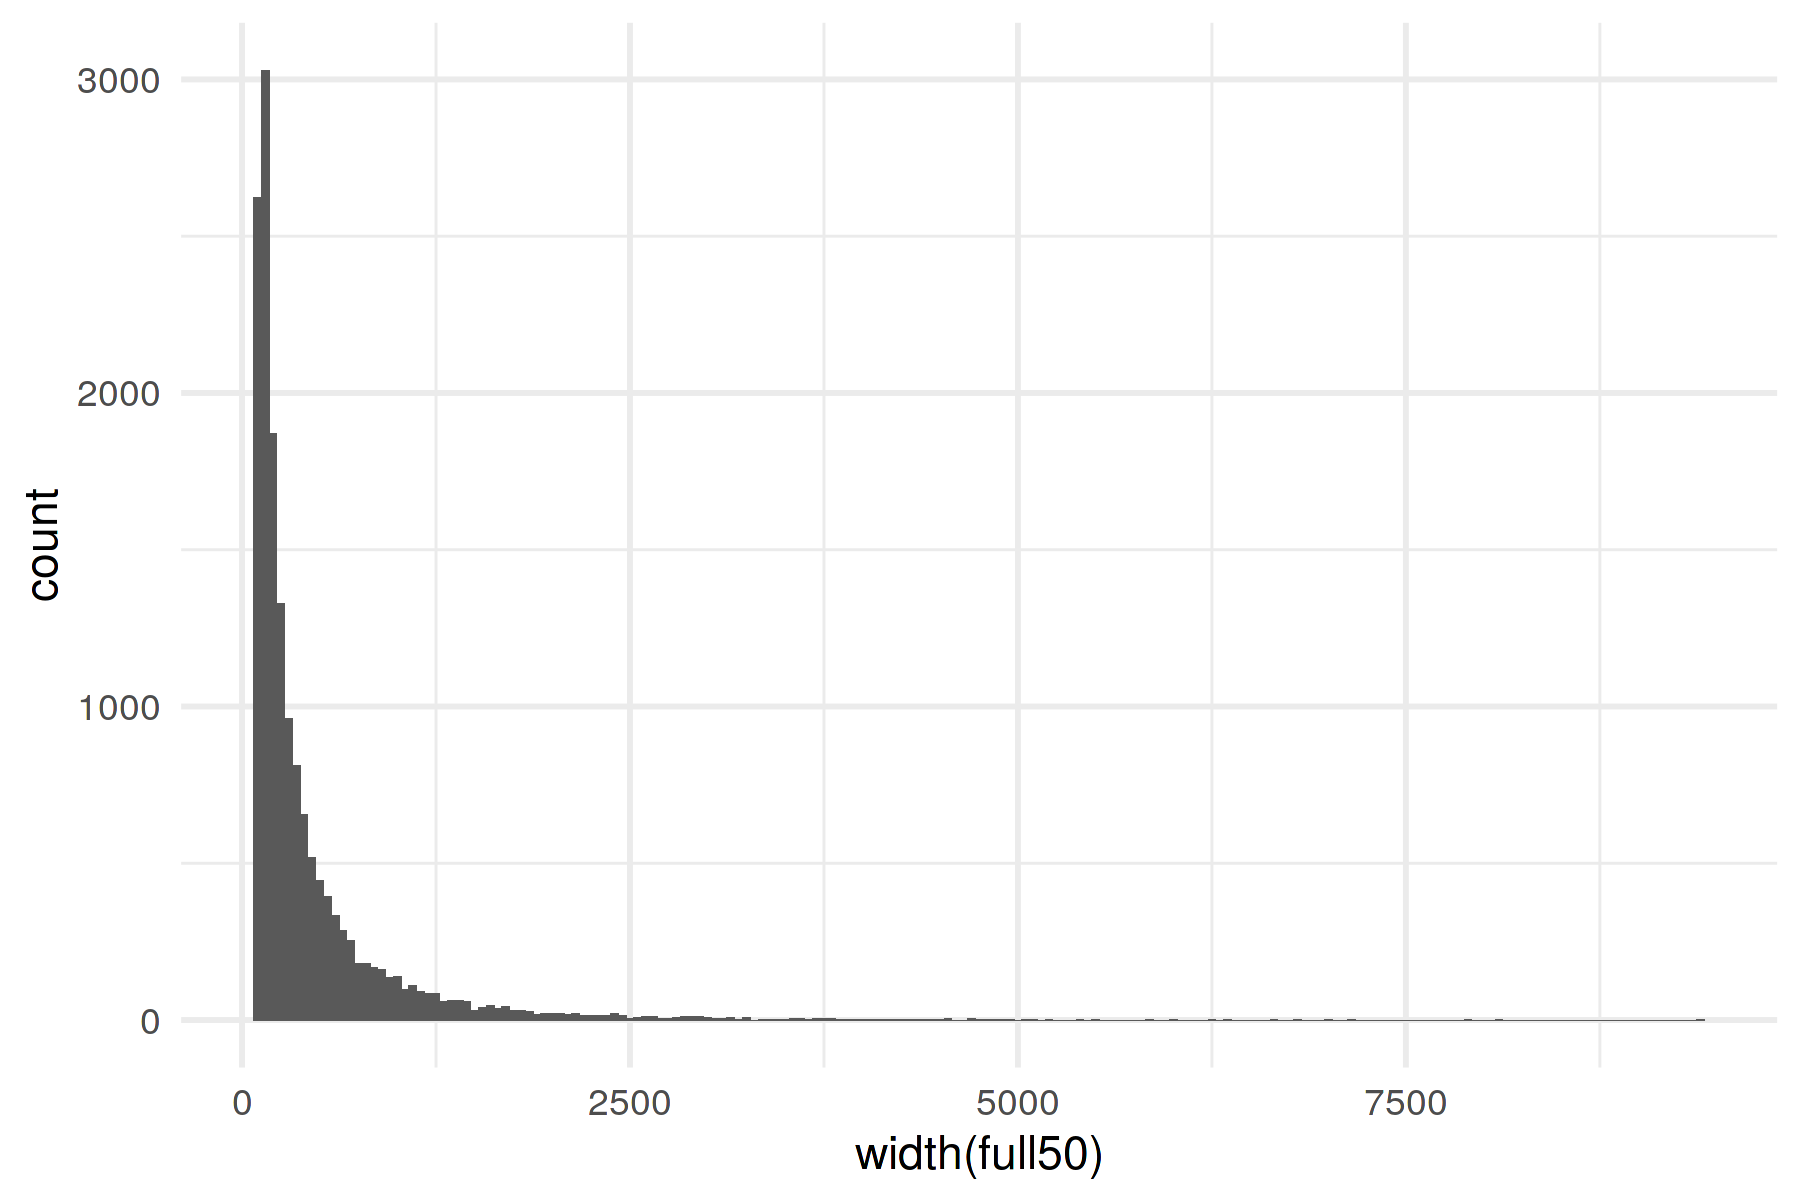

In [24]:
set_dim(6, 4)

ggplot() + geom_histogram(aes(width(full50)), binwidth = 50) +
    theme_minimal()

## Comparison with Davalos *et al.*, 2018

Load coordinates of their capture regions:

In [52]:
df_davalos <- read_tsv(url("https://static-content.springer.com/esm/art%3A10.1186%2Fs12864-018-4945-x/MediaObjects/12864_2018_4945_MOESM1_ESM.bed"),
             col_names = c("chrom", "start", "end"), col_types = "cii") %>%
    mutate(chrom = str_replace(chrom, "chr", ""))

In [53]:
davalos <- makeGRangesFromDataFrame(df_davalos, starts.in.df.are.0based = T)

Capture region characteristics:

In [54]:
length(davalos)

[1] 4109

In [55]:
width(davalos) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    259     503    1171    2157    2686   93458 

In [56]:
(total_davalos <- sum(width(davalos)))

[1] 8864429

In [57]:
(total_full <- sum(width(full50)))

[1] 6912728

What is the overlap between our design and that of Davalos *et al.*?

In [58]:
(total_overlap <- sum(width(intersect(full50, davalos))))

[1] 6274901

In [59]:
total_overlap / total_full

[1] 0.9077315

#### Davos regions after using a mappability filter

In [102]:
davalos_map50 <- import.bed("../revisions/davalos_map50.bed")

In [ ]:
davalos_map50_99bp <- davalos_map[]

In [103]:
length(davalos_map50)

[1] 30102

In [104]:
width(davalos_map50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    35.0    80.0   236.9   225.0 10290.0 

In [105]:
(total_davalos_map50 <- sum(width(davalos_map50)))

[1] 7130632

In [106]:
(total_overlap_map50 <- sum(width(intersect(davalos, davalos_map50))))

[1] 7130632

In [107]:
1 - total_overlap_map50 / total_davalos

[1] 0.1955904

#### Davos regions after using a mappability filter and minimum 99 bp regions

In [102]:
davalos_map50 <- import.bed("../revisions/davalos_map50.bed")

In [150]:
davalos_map50_99 <- davalos_map50[width(davalos_map50) >= 99]

In [151]:
length(davalos_map50_99)

[1] 13322

In [152]:
width(davalos_map50_99) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   99.0   154.0   263.0   480.3   541.0 10290.0 

In [181]:
(total_davalos_map50_99 <- sum(width(davalos_map50_99)))

[1] 6398623

In [182]:
1 - total_overlap_map50_99 / total_davalos

[1] 0.2781686

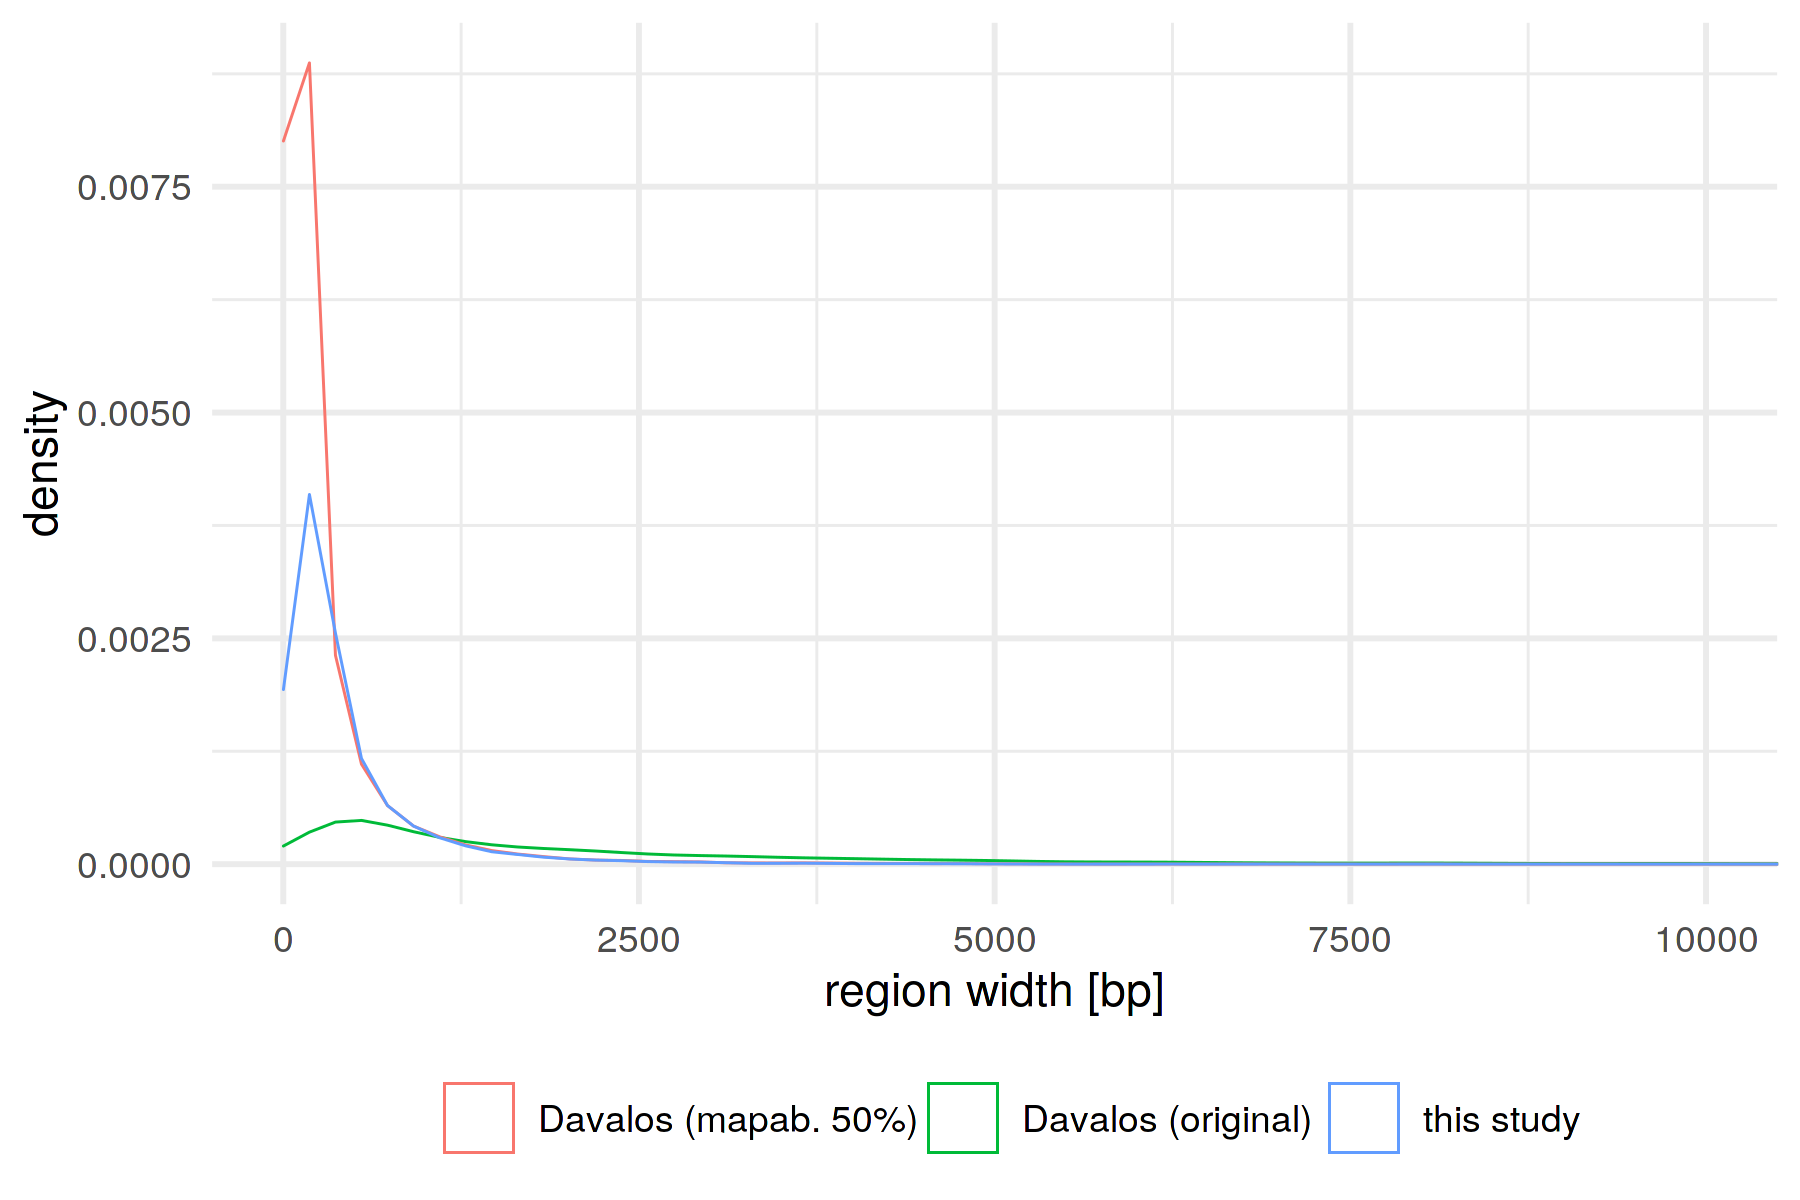

In [183]:
ggplot() +
    geom_density(aes(width(davalos), color = "Davalos (original)"), size = 0.25) +
    geom_density(aes(width(davalos_map50), color = "Davalos (mapab. 50%)"), size = 0.25) +
    geom_density(aes(width(full50), color = "this study"), size = 0.25) +
    coord_cartesian(x = c(0, 10000)) +
    xlab("region width [bp]") +
    theme_minimal() +
    theme(legend.position = "bottom") +
    guides(color = guide_legend(title = ""))

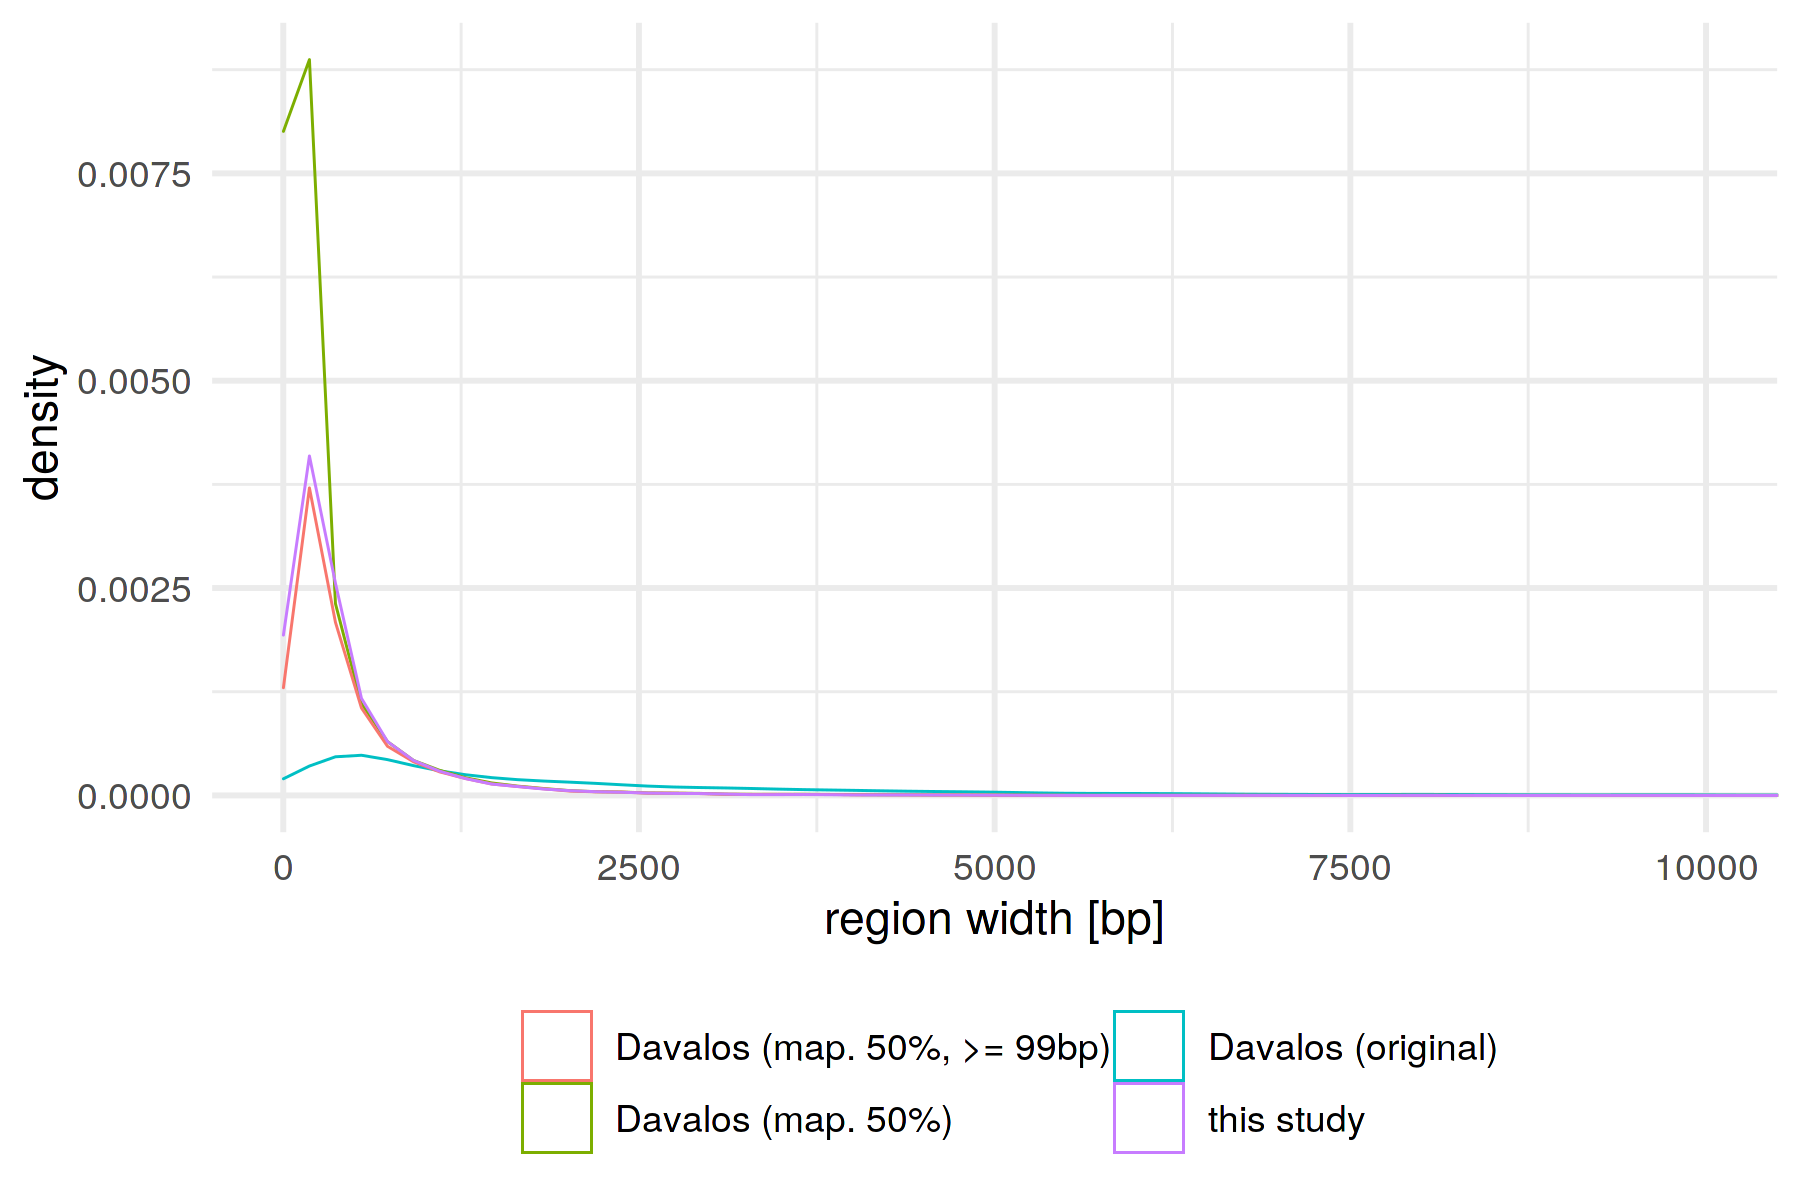

In [188]:
ggplot() +
    geom_density(aes(width(davalos), color = "Davalos (original)"), size = 0.25) +
    geom_density(aes(width(davalos_map50), color = "Davalos (map. 50%)"), size = 0.25) +
    geom_density(aes(width(davalos_map50_99), color = "Davalos (map. 50%, >= 99bp)"), size = 0.25) +
    geom_density(aes(width(full50), color = "this study"), size = 0.25) +
    coord_cartesian(x = c(0, 10000)) +
    xlab("region width [bp]") +
    theme_minimal() +
    theme(legend.position = "bottom") +
    guides(color = guide_legend(title = "", nrow = 2))

<br><br><br><br><br>
## Characteristics after 100% mappability filtering

### Lippold capture set

In [51]:
bed <- import.bed(here("data/coord/capture_lippold.bed"))

In [52]:
length(bed)

[1] 3657

In [53]:
width(bed) %>% sum

[1] 433416

In [54]:
import.bed("../input/basti_design.bed") %>% width %>% sum

[1] 573657

In [56]:
433416 / 573657

[1] 0.7555316

### Full Y chromosome capture set

In [41]:
bed <- import.bed(here("data/coord/capture_full.bed"))

In [42]:
length(bed)

[1] 48998

In [43]:
width(bed) %>% sum

[1] 4602444

In [44]:
read_delim("../input/Y.filt35_50_SRepeat_100.bed", delim = " ",
           col_names = c("chrom", "start", "end", "width"), col_types = "ciii") %>%
    makeGRangesFromDataFrame(starts.in.df.are.0based = TRUE) %>%
    width %>% sum

[1] 6913053

In [45]:
4602444 / 6913053

[1] 0.6657614

In [14]:
width(bed) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   99.0   145.0   240.0   434.6   489.8  9425.0 